In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("cleaned_dataset.csv")
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_per_capita
0,Afghanistan,2002,2.342686,2.219203,2.248129,3.659193,0.122218,0.0,0.444686,4.408662,5.355936,0.875469,6.938284,179.426579
1,Afghanistan,2003,2.756110,2.351375,2.207175,3.628599,0.270027,0.0,0.488580,4.219821,5.442280,0.875469,7.107425,190.683814
2,Afghanistan,2004,3.047611,2.476538,2.169054,3.811982,0.285179,0.0,0.444686,4.157653,5.324137,0.788457,6.938284,211.382074
3,Afghanistan,2005,3.273019,2.580217,2.141242,3.551914,0.292670,0.0,0.463734,4.165748,5.533663,0.879627,7.346655,242.031313
4,Afghanistan,2006,3.456906,2.698000,2.128232,3.493169,0.182322,0.0,0.494696,4.346276,5.721691,0.916291,7.473637,263.733602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,Zimbabwe,2016,3.774179,3.427515,4.157006,4.417635,1.504077,0.0,1.463255,3.905609,8.079829,2.397895,9.307558,1464.588957
3005,Zimbabwe,2017,3.810624,3.427515,4.148359,4.424367,1.398717,0.0,1.667707,4.086034,8.029111,2.352327,9.243872,1235.189032
3006,Zimbabwe,2018,3.841013,3.430756,4.425206,4.397285,1.553925,0.0,1.865629,4.101194,8.144094,2.382320,9.423918,1254.642265
3007,Zimbabwe,2019,3.866638,3.437208,4.411585,4.412798,1.539015,0.0,1.719189,4.035700,8.007918,2.439735,9.372544,1316.740657


## Label Categorization

In [ ]:
category_amt = 10
limiters = np.arange(1/category_amt,1,1/category_amt)
limiters

In [ ]:
df['gdp_per_capita_category'] = np.nan
percentiles = df.groupby('Year')['gdp_per_capita'].quantile(limiters).unstack()
percentiles

In [ ]:
def categorize(row):
    year = row['Year']
    val = row['gdp_per_capita']
    
    q = np.zeros(len(limiters))
    
    for i in range(len(limiters)):
        q[i] = percentiles.loc[year, limiters[i]]
    
    pos = 0
    
    for i in q:
        if val <= i:
            break
        else:
            pos+=1
    return pos            

In [ ]:
df['gdp_per_capita_category'] = df.apply(categorize, axis=1)

In [ ]:
df.drop(['gdp_per_capita'], axis=1, inplace=True) # Unused
df.drop(['Entity', 'Year'], axis = 1, inplace=True) # Irrelevant

df.head()

## Correlation Check

<Axes: >

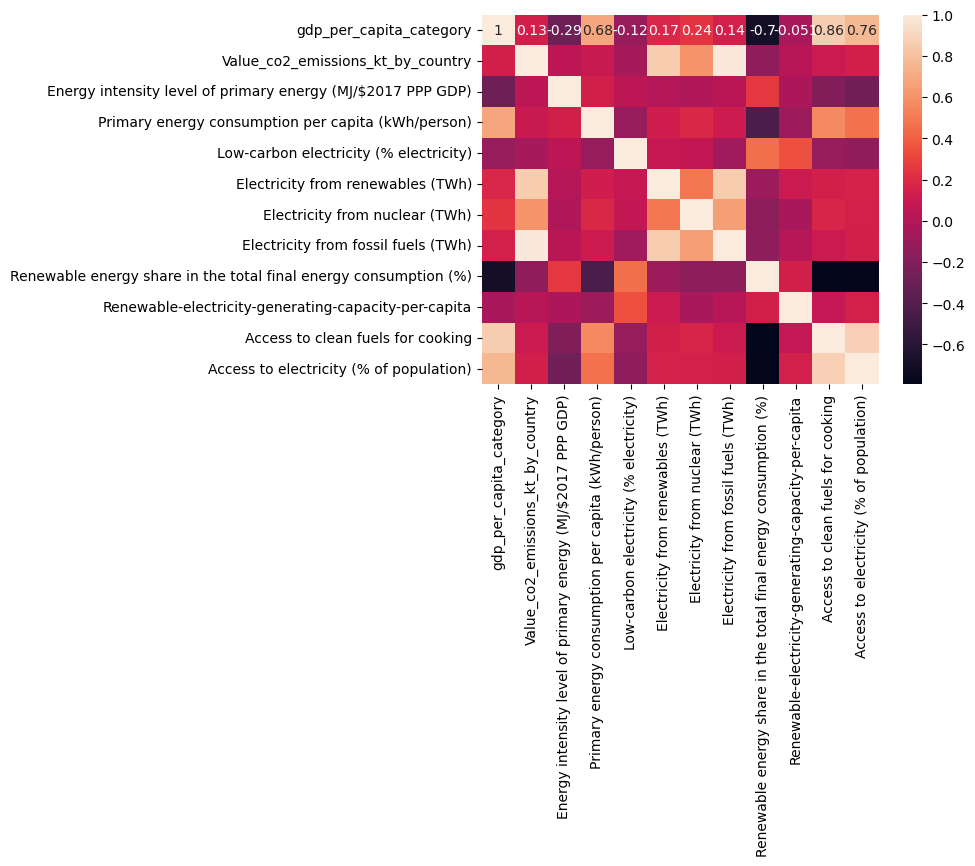

In [76]:
sns.heatmap(dataset[col[::-1]].corr(), annot=True)

In [77]:
temp = dataset.copy()
temp['gdp_per_capita_category'].replace([0,1,2,3,4,5,6,7,8,9], 
                                        ['0 - 1', '0 - 1', '2 - 3', '2 - 3', '4 - 5', '4 - 5', '6 - 7', '6 - 7', '8 - 9', '8 - 9'],
                                        inplace=True)

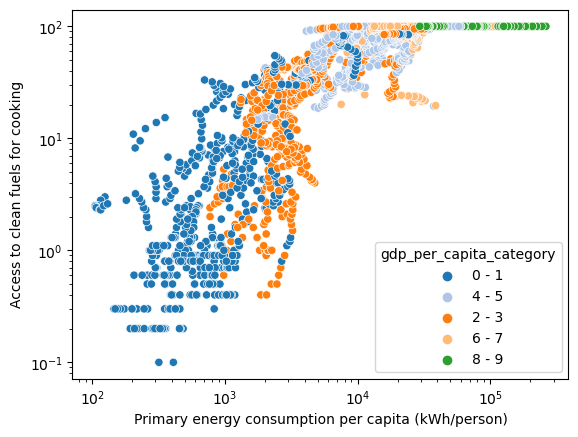

In [80]:
sns.scatterplot(temp, x="Primary energy consumption per capita (kWh/person)", y="Access to clean fuels for cooking", hue="gdp_per_capita_category", palette="tab20")
plt.xscale('log')
plt.yscale('log')
plt.show()

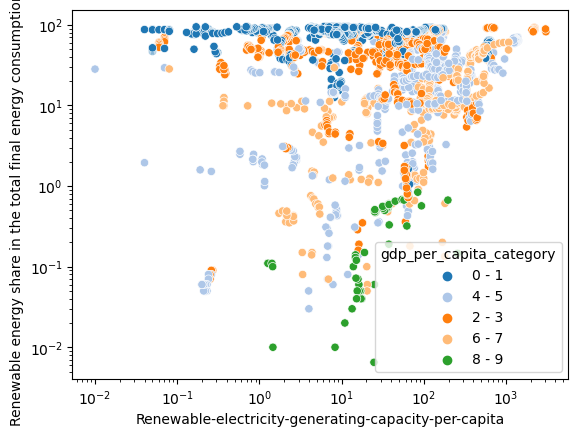

In [81]:
sns.scatterplot(temp, x="Renewable-electricity-generating-capacity-per-capita", y="Renewable energy share in the total final energy consumption (%)", hue="gdp_per_capita_category", palette="tab20")
plt.xscale('log')
plt.yscale('log')
plt.show()